In [1]:
import  warnings
warnings.filterwarnings('ignore')

## data ingestion

In [2]:
import pandas as  pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as  plt


In [20]:
df  =  pd.read_csv('Cars.csv' ,  keep_default_na= False  ,  na_values=["" , "NA"])

### basic checks

In [21]:
df.shape

(8556, 28)

In [22]:
df.head()

,id1,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Toyota,Tercel,Small,7.8,9.8,11.8,32,37,Driver only,...,5,162,94,65,36,24.0,11.0,2055,non-USA,Toyota Tercel
1,2,Lexus,ES300,Midsize,27.5,28.0,28.4,18,24,Driver only,...,5,188,103,70,40,27.5,14.0,3510,non-USA,Lexus ES300
2,3,Subaru,Legacy,Compact,16.3,19.5,22.7,23,30,Driver only,...,5,179,102,67,37,27.0,14.0,3085,non-USA,Subaru Legacy
3,4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
4,5,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8556 entries, 0 to 8555
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id1                 8556 non-null   int64  
 1   Manufacturer        8556 non-null   object 
 2   Model               8556 non-null   object 
 3   Type                8556 non-null   object 
 4   Min.Price           8556 non-null   float64
 5   Price               8556 non-null   float64
 6   Max.Price           8556 non-null   float64
 7   MPG.city            8556 non-null   int64  
 8   MPG.highway         8556 non-null   int64  
 9   AirBags             8185 non-null   object 
 10  DriveTrain          8556 non-null   object 
 11  Cylinders           8556 non-null   object 
 12  EngineSize          8556 non-null   float64
 13  Horsepower          8556 non-null   int64  
 14  RPM                 8556 non-null   int64  
 15  Rev.per.mile        8556 non-null   int64  
 16  Man.tr

In [24]:
df.isnull().sum()

,0
id1,0
Manufacturer,0
Model,0
Type,0
Min.Price,0
Price,0
Max.Price,0
MPG.city,0
MPG.highway,0
AirBags,371


In [26]:
df.duplicated().sum()

np.int64(0)

In [27]:
# seperate  x  and y
x =  df.drop(['id1' ,  'Weight'] , axis  = 1)
y  =  df['Weight']

## preprocessing  for  independent fields

In [28]:
#  seperate cat and  num data
cat  =  x.columns[x.dtypes  =='object']
num  =  x.columns[x.dtypes  !=  'object']


In [17]:
print(cat)
print()
print()
print(num)

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')


Index(['id1', 'Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room', 'Weight'],
      dtype='object')


In [29]:
x['AirBags'].value_counts()

,count
AirBags,
Driver only,3854
None,3063
Driver & Passenger,1268


In [30]:
## create  pipelines

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder ,  StandardScaler
from sklearn.compose import  ColumnTransformer
from  sklearn.impute  import SimpleImputer

In [37]:
num_pipeline  =  Pipeline(steps  =  [('imputer' , SimpleImputer(strategy  =  'mean' ) ) ,
                                     ('scaler' , StandardScaler())])

cat_pipeline  =  Pipeline(steps  =  [('imputer' ,  SimpleImputer(strategy  = 'most_frequent' ) )
,  ('encoder' ,  OneHotEncoder(handle_unknown= 'ignore' ,  sparse_output=True))])

In [38]:
#  combile  pipelines
pre =  ColumnTransformer([('num' ,  num_pipeline  , num ) ,
                          ('cat' , cat_pipeline , cat)])

In [39]:
##  aply  pipeline
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object'))])

In [40]:
##  apply transformation
x_scaled  =  pre.fit_transform(x)


In [41]:
x_scaled

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 221251 stored elements and shape (8556, 257)>

In [43]:
# convert in  dataframe
x_scaled =  pd.DataFrame(x_scaled.toarray()  ,  columns =  pre.get_feature_names_out())

In [45]:
x_scaled.head()

,num__Min.Price,num__Price,num__Max.Price,num__MPG.city,num__MPG.highway,num__EngineSize,num__Horsepower,num__RPM,num__Rev.per.mile,num__Fuel.tank.capacity,...,cat__Make_Toyota Camry,cat__Make_Toyota Celica,cat__Make_Toyota Previa,cat__Make_Toyota Tercel,cat__Make_Volkswagen Corrado,cat__Make_Volkswagen Eurovan,cat__Make_Volkswagen Fox,cat__Make_Volkswagen Passat,cat__Make_Volvo 240,cat__Make_Volvo 850
0,-1.065131,-1.008628,-0.923020,1.680241,1.461275,-1.126873,-1.180752,-0.127721,2.370666,-1.443413,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.181869,0.876793,0.587973,-0.776170,-0.949254,0.330813,0.818523,-0.127721,-0.024507,0.558949,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.095613,-0.003761,0.069138,0.101120,0.163298,-0.446619,-0.249051,0.548139,-0.014358,-0.229860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.278111,-0.335263,-0.358673,-0.776170,-1.134679,1.108245,0.527367,-0.803580,-1.313435,1.014032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.985289,-0.635688,-0.331366,0.452036,1.275850,-0.446619,-0.637259,-0.127721,0.087133,-0.442232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# TRAIN_TETS _SPLIT
from sklearn.model_selection import train_test_split
x_train  , x_test  ,  y_train ,  y_test  =  train_test_split(x_scaled  ,  y  ,
                                                             test_size = 0.2  ,
                                                             random_state  =  3)

In [48]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  , y_test.shape)

(6844, 257) (6844,)
(1712, 257) (1712,)


### fit model

In [54]:
##create  architecture
import keras
from keras.models  import Sequential
from  keras.layers  import Dense ,  Dropout


In [86]:
##  add  layers
nn  =  Sequential()

## add  input layer
nn.add(Dense(units  =  300  ,  input_dim =  (x_train.shape[1]) ,  activation='relu'))

#  add  hidden layers
nn.add(Dense(units =  300 ,  activation='relu'))
nn.add(Dropout(0.2))

nn.add(Dense(units =  300  , activation ='relu'))
#nn.add(Dropout(0.2))

## add output layer

nn.add(Dense(units  =  1, activation =  'linear'))

In [87]:
##  compile model
nn.compile(optimizer='adam' ,  loss  =  'mse' ,
           metrics  =  ['mae'] )

In [88]:
nn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                │ (None, 300)            │        77,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 300)            │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │           301 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,301 (1008.99 KB)

 Trainable params: 258,301 (1008.99 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
## fit  the  model
hist  =  nn.fit(x_train  ,  y_train,
       validation_split= 0.2 , epochs  =  50)

Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 5409849.5000 - mae: 1907.7190 - val_loss: 2386.3000 - val_mae: 36.3306
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11855.1162 - mae: 85.7761 - val_loss: 569.0579 - val_mae: 18.6375
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11543.8701 - mae: 83.9183 - val_loss: 630.4262 - val_mae: 18.9223
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11148.5674 - mae: 82.5111 - val_loss: 819.4862 - val_mae: 23.0485
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11619.6650 - mae: 84.2410 - val_loss: 1721.0037 - val_mae: 35.0330
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12173.6250 - mae: 86.7933 - val_loss: 983.1581 - val_mae: 26.2830
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10850.0898 - mae: 81.1080 - val_loss: 893.1143 - val_mae: 22.0624
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 11023.2861 - mae: 82.0887 - val_loss: 1122.4132 - v

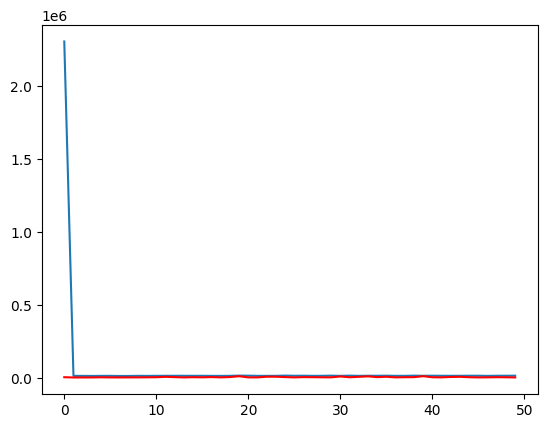

In [90]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'] ,  c= 'r')

In [91]:
nn.evaluate(x_train  , y_train)



214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 801.3729 - mae: 21.5515


[819.7832641601562, 21.847570419311523]

In [92]:
nn.evaluate(x_test , y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 853.5433 - mae: 22.2026


[852.7261962890625, 22.357624053955078]